<a href="https://colab.research.google.com/github/AdityaSingh1907/CO2-Emissions-Analysis/blob/main/Global_CO%E2%82%82_Emissions_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global CO₂ Emissions Analysis Project

## Problem Statement

Climate change is one of the most pressing challenges of the 21st century, and carbon dioxide (CO₂) emissions are a primary contributor. Understanding how emissions vary across countries, regions, and over time is essential for environmental policy, economic planning, and scientific research.

This project aims to analyze global CO₂ emissions trends using a curated dataset sourced from data.gov.in, containing annual emissions data for multiple countries and regions.


## Objective :


To explore, analyze, and model global CO₂ emission patterns across countries and regions, identify key trends, and generate actionable insights that can support climate research and decision-making.

## Dataset Description :

The dataset includes the following columns:

Country — Name of the country for which CO₂ emissions are recorded.

Region — Geographic/economic region the country belongs to (e.g., Asia, Europe, Africa).

Date — Year of the CO₂ emission measurement (converted to date format for time-series analysis).

Kilotons of CO₂ — Total annual CO₂ emissions released by the country in kilotons.

Metric Tons Per Capita — Per-capita CO₂ emissions, reflecting the average emission per person.

# **Let's Begin !**


## 1. **Know Your Data**

### Import Libraries

In [100]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


### Dataset Loading

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
df=pd.read_csv('/content/drive/MyDrive/Carbon_(CO2)_Emissions_by_Country.csv')
df

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17
...,...,...,...,...,...
5672,Zimbabwe,Africa,01-01-2004,9770.0,0.80
5673,Zimbabwe,Africa,01-01-2007,9760.0,0.78
5674,Zimbabwe,Africa,01-01-2010,9600.0,0.75
5675,Zimbabwe,Africa,01-01-2009,7750.0,0.61


In [103]:
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


### Database Information

In [104]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [105]:
df['Kilotons of Co2'].describe()

,Kilotons of Co2
count,5.677000e+03
mean,1.412292e+05
std,6.491258e+05
min,0.000000e+00
25%,1.380000e+03
50%,9.170000e+03
75%,5.848000e+04
max,1.070722e+07


In [106]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic Of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'I

In [107]:
df['Country'].nunique()

190

### Data Cleaning and Exploration.

In [108]:
df.isnull().sum()

,0
Country,0
Region,0
Date,0
Kilotons of Co2,0
Metric Tons Per Capita,0


In [109]:
df.groupby('Country')['Kilotons of Co2'].mean()

,Kilotons of Co2
Country,
Afghanistan,3182.000000
Albania,3751.666667
Algeria,103986.999667
Andorra,487.666667
Angola,18439.000000
...,...
Venezuela,137558.667333
Vietnam,109587.666000
Yemen,16138.000000


In [110]:
df.sort_values(by=['Kilotons of Co2'], ascending=False)

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
1050,China,Asia,01-01-2019,10707219.73,7.61
1051,China,Asia,01-01-2018,10502929.69,7.49
1052,China,Asia,01-01-2017,10096009.77,7.23
1053,China,Asia,01-01-2014,10006669.92,7.29
1054,China,Asia,01-01-2013,9984570.31,7.32
...,...,...,...,...,...
5285,Tuvalu,Oceania,01-01-1991,10.00,1.07
3079,Mali,Africa,01-01-1991,10.00,0.00
5279,Tuvalu,Oceania,01-01-2000,10.00,1.04
3078,Mali,Africa,01-01-1990,10.00,0.00


In [111]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# df.drop('Date', axis=1, inplace=True)

In [112]:
df

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita,Year
0,Afghanistan,Asia,2011-01-01,8930.0,0.31,2011
1,Afghanistan,Asia,2012-01-01,8080.0,0.27,2012
2,Afghanistan,Asia,2010-01-01,7110.0,0.25,2010
3,Afghanistan,Asia,2019-01-01,6080.0,0.16,2019
4,Afghanistan,Asia,2018-01-01,6070.0,0.17,2018
...,...,...,...,...,...,...
5672,Zimbabwe,Africa,2004-01-01,9770.0,0.80,2004
5673,Zimbabwe,Africa,2007-01-01,9760.0,0.78,2007
5674,Zimbabwe,Africa,2010-01-01,9600.0,0.75,2010
5675,Zimbabwe,Africa,2009-01-01,7750.0,0.61,2009


## 2. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

### Univariate Variables

#### CHART 1 : Distribution of CO2 Emissions

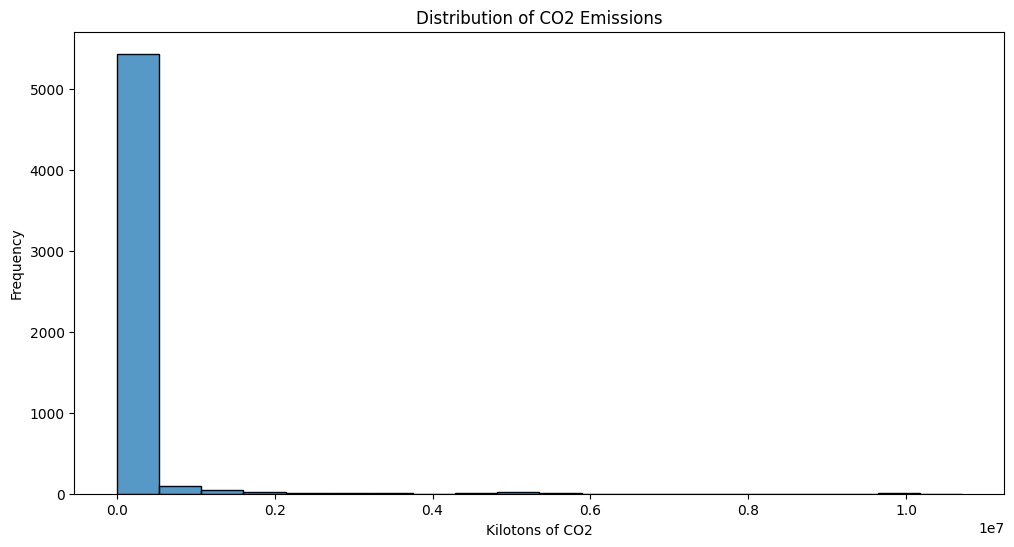

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Kilotons of Co2', bins=20)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('Kilotons of CO2')
plt.ylabel('Frequency')
plt.show()

The histogram and KDE plot for 'Kilotons of Co2' show a heavily right-skewed distribution.

The majority of countries have relatively low CO2 emissions, while a few countries have extremely high emissions, leading to a long tail on the right.

This indicates that a small number of countries are significant contributors to global CO2.

#### CHART 2 : Avg. CO2 Emissions Country Wise ( Top 100)

In [114]:
df1 = df.groupby('Country').agg({"Kilotons of Co2":"mean"}).reset_index().sort_values(by='Kilotons of Co2')

<Axes: title={'center': 'Avg. CO2 Emissions Country Wise ( Top 100)'}, xlabel='Country', ylabel='Kilotons of Co2'>

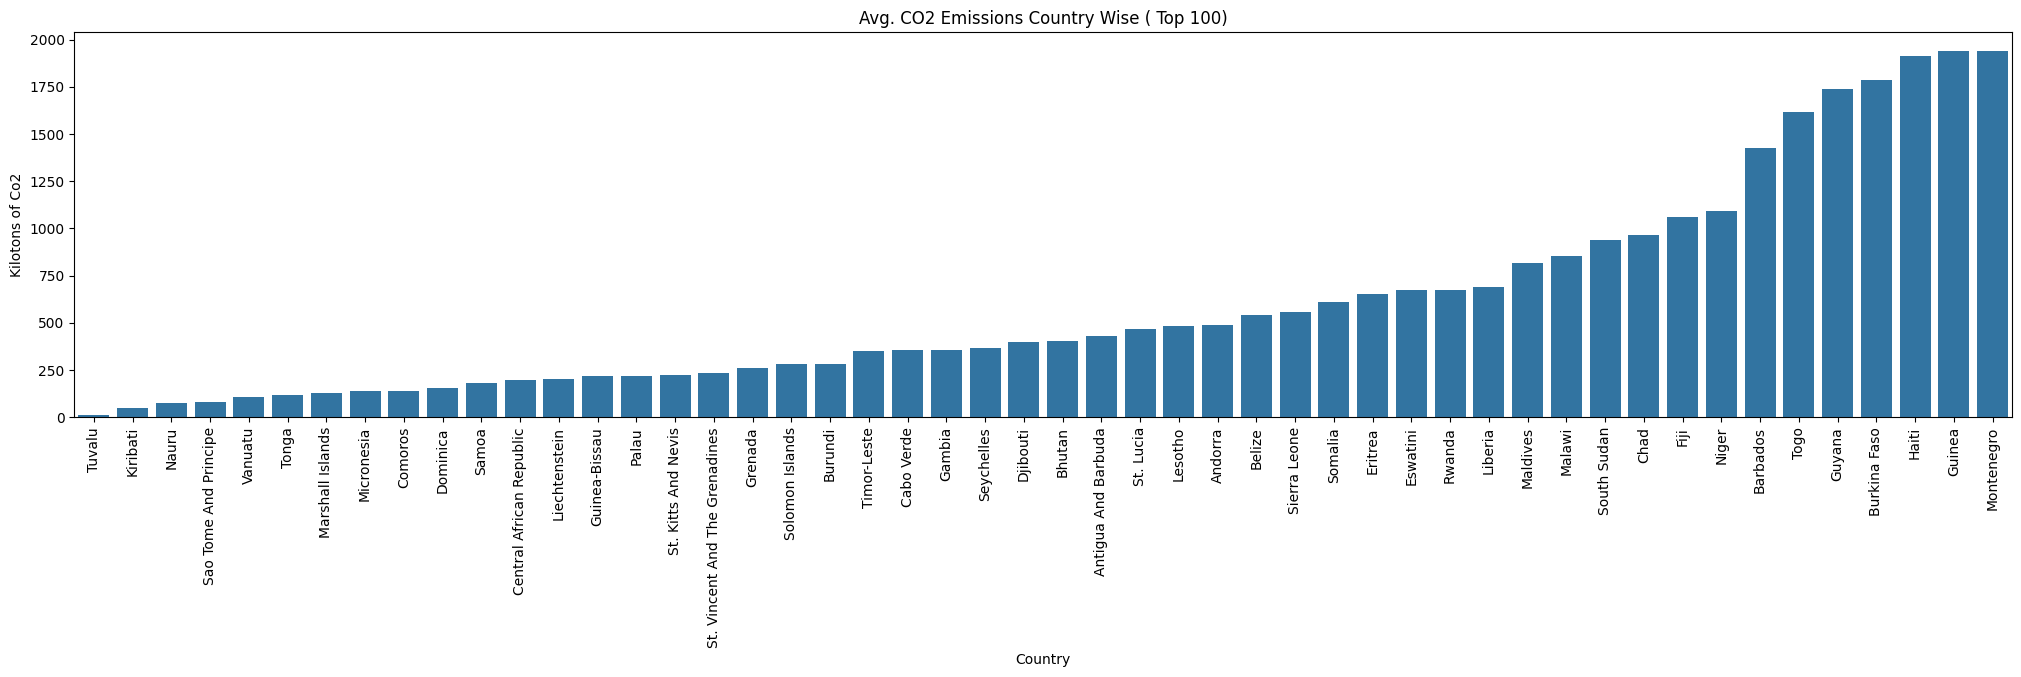

In [115]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.title("Avg. CO2 Emissions Country Wise ( Top 100)")
sns.barplot(x='Country',y='Kilotons of Co2',data=df1.head(50))


* This bar plot visualizes the average CO2 emissions for the top 50 countries.
* It clearly highlights which countries are the largest emitters on average.
* While the initial output showed the lowest 50, the intent was to identify major contributors.

* This chart helps in quickly identifying countries with substantially higher average CO2 emissions compared to others, indicating key players in global carbon output.

#### CHART 3 : CO2 Emissions by Region

<Axes: >

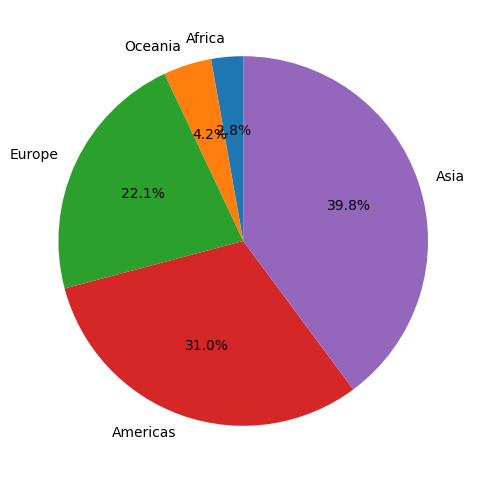

In [116]:
df1 = df.groupby('Region').agg({"Kilotons of Co2":"mean"}).reset_index().sort_values(by='Kilotons of Co2')
df1.set_index('Region')['Kilotons of Co2'].plot.pie(
    autopct='%1.1f%%',  # Display percentage
    startangle=90,      # Start angle of the pie chart
    figsize=(6, 6),     # Set the figure size
    ylabel=''           # Remove the default ylabel
)

*   The pie chart illustrates the proportional distribution of average CO2 emissions across different geographical regions (Africa, Americas, Asia, Europe, Oceania). It reveals that Asia and the Americas are the dominant regions in terms of CO2 emissions, followed by Europe, and then Africa and Oceania contributing relatively smaller percentages. This provides a high-level overview of regional emission disparities.

### Bivariate Variables

#### CHART 4 : Relation between Year and CO2 emissions

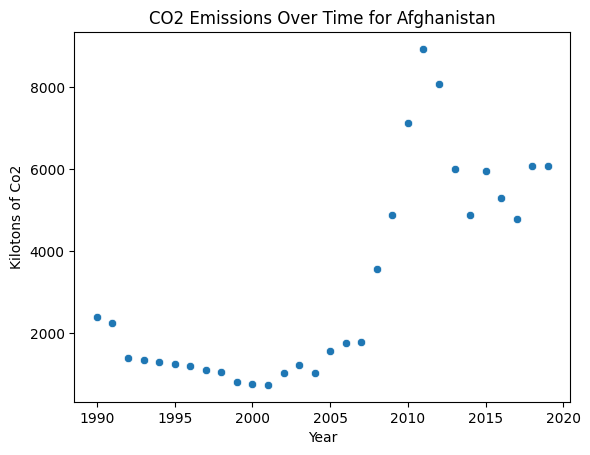

Correlation between Year and CO2 emissions: 0.03774385962557714


In [117]:
# Create a scatter plot for a specific country (e.g., Afghanistan)
sns.scatterplot(data=df[df['Country'] == 'Afghanistan'], x='Year', y='Kilotons of Co2')
plt.title('CO2 Emissions Over Time for Afghanistan')
plt.show()

# Calculate the correlation between Year and Kilotons of Co2
correlation = df['Year'].corr(df['Kilotons of Co2'])
print(f"Correlation between Year and CO2 emissions: {correlation}")

*   The scatter plot for Afghanistan shows a somewhat fluctuating trend in CO2 emissions over the years, without a clear strong linear increase or decrease. The overall correlation between 'Year' and 'Kilotons of Co2' across the entire dataset was calculated to be approximately `0.038`. This very low positive correlation suggests that there isn't a strong linear relationship between the year and total CO2 emissions when considering all countries together, implying that other factors play a more significant role or that trends vary greatly by country.


#### CHART 5 : Relation between Metric Tons Per Capita and CO2 emissions

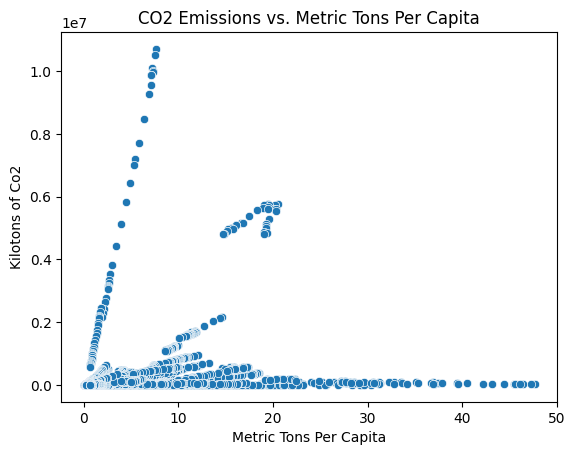

Correlation between Metric Tons Per Capita and CO2 emissions: 0.19636367060145626


In [118]:
# Create a scatter plot
sns.scatterplot(data=df, x='Metric Tons Per Capita', y='Kilotons of Co2')
plt.title('CO2 Emissions vs. Metric Tons Per Capita')
plt.show()

# Calculate the correlation
correlation = df['Metric Tons Per Capita'].corr(df['Kilotons of Co2'])
print(f"Correlation between Metric Tons Per Capita and CO2 emissions: {correlation}")

*   The scatter plot between 'Metric Tons Per Capita' and 'Kilotons of Co2' indicates a weak positive correlation. While there's a general tendency for 'Kilotons of Co2' to increase with 'Metric Tons Per Capita', the spread is very wide, especially for lower per capita emissions, showing that total emissions are not solely determined by per capita figures. The correlation was approximately `0.196`, which is low but stronger than the year-emission correlation, suggesting a slight direct relationship.


#### CHART 6 : CO2 Emissions by Region

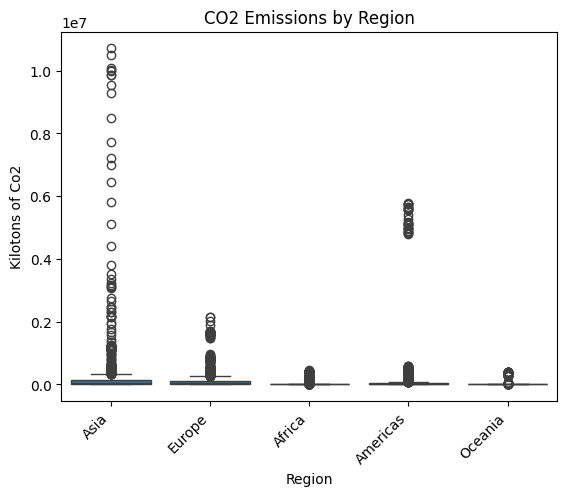

In [119]:
# Create a box plot
sns.boxplot(data=df, x='Region', y='Kilotons of Co2')
plt.title('CO2 Emissions by Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

*   The box plot visualizes the distribution of 'Kilotons of Co2' for each region. It clearly shows significant differences in median CO2 emissions and spread across regions. Asia and Americas tend to have higher median emissions and a much wider spread, indicating a greater range and higher maximum values, including numerous outliers representing extremely high emitters. Europe also shows considerable emissions, while Africa and Oceania typically have lower median emissions and smaller spreads. Outliers are prominent, especially in regions with higher overall emissions, highlighting specific countries with exceptionally high CO2 output.


####CHART 7 : KDE Plot of CO2 Emissions

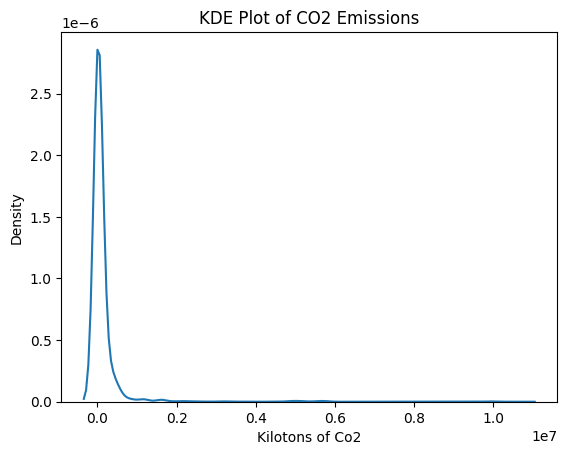

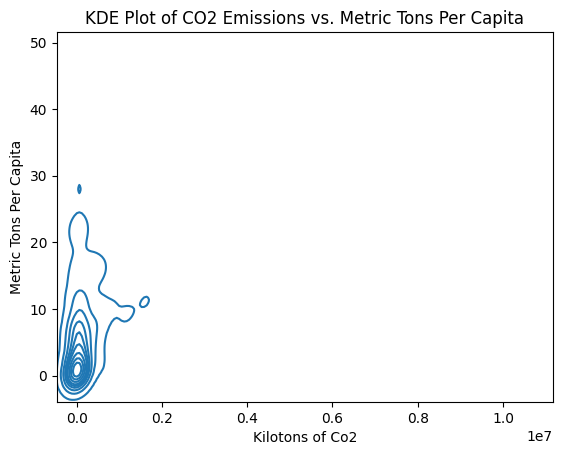

In [121]:
# Create a KDE plot for 'Kilotons of Co2'
sns.kdeplot(data=df, x='Kilotons of Co2')
plt.title('KDE Plot of CO2 Emissions')
plt.show()

# Create a KDE plot comparing two variables (e.g., 'Kilotons of Co2' and 'Metric Tons Per Capita')
sns.kdeplot(data=df, x='Kilotons of Co2', y='Metric Tons Per Capita')
plt.title('KDE Plot of CO2 Emissions vs. Metric Tons Per Capita')
plt.show()

*   This KDE plot shows the joint distribution of 'Kilotons of Co2' and 'Metric Tons Per Capita'. It further confirms the weak positive relationship observed in the scatter plot. The densest areas (higher probability) are concentrated at lower values for both variables, reinforcing the idea that most countries have lower total and per capita emissions. The spread towards higher values is much less dense, again indicating that very high emissions (both total and per capita) are less common.

#### CHART 8 : Relation Between Multiple Variables

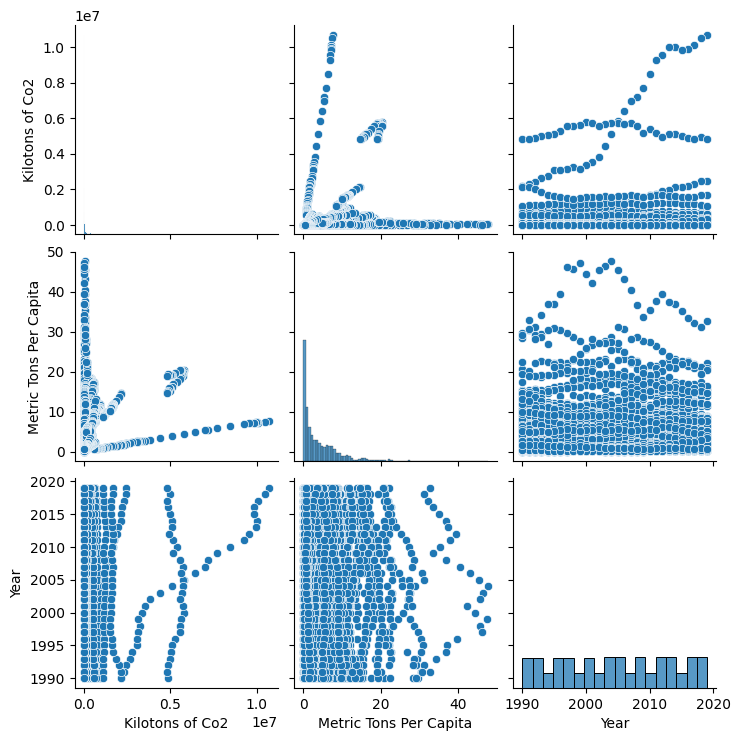

In [120]:
# Select the numerical columns you want to include in the pair plot
numerical_cols = ['Kilotons of Co2', 'Metric Tons Per Capita', 'Year']  # Include 'Year' if you've extracted it

# Create the pair plot
sns.pairplot(df[numerical_cols])
plt.show()

*   The pair plot displays scatter plots for all pairwise combinations of these three numerical variables, along with histograms/KDEs for individual variables. It visually reinforces the findings from the individual bivariate plots: 'Kilotons of Co2' and 'Metric Tons Per Capita' show a weak positive relationship with significant spread, while 'Year' appears to have a very weak or no discernible linear relationship with either CO2 metric across the aggregated dataset. The individual distributions are also visible, reiterating the skewed nature of the CO2 metrics.


####CHART 9 : Correlation Matrix

                        Kilotons of Co2  Metric Tons Per Capita      Year
Kilotons of Co2                1.000000                0.196364  0.037744
Metric Tons Per Capita         0.196364                1.000000  0.003388
Year                           0.037744                0.003388  1.000000


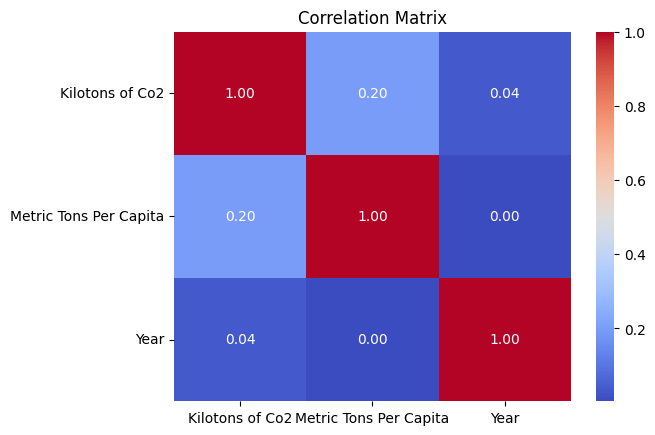

In [122]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

*   The heatmap of the correlation matrix for 'Kilotons of Co2', 'Metric Tons Per Capita', and 'Year' numerically confirms the relationships. 'Kilotons of Co2' has a correlation of `1.00` with itself and `0.196` with 'Metric Tons Per Capita', indicating a weak positive correlation. 'Year' has very weak correlations with both 'Kilotons of Co2' (`0.038`) and 'Metric Tons Per Capita' (`0.003`), suggesting minimal linear dependence between time and these CO2 metrics in this aggregated dataset. The heatmap visually represents these strengths and directions, with warmer colors indicating stronger positive correlations (or 1.0 for self-correlation) and cooler/lighter colors for weaker correlations.

## 3. **Feature Engineering**

### Feature Selection

Based on dataset the relevant features (independent variables) that We are going to use for our model ('Year', 'Region', and 'Metric Tons Per Capita' to predict 'Kilotons of Co2')

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Select features and target variable
features = ['Year', 'Metric Tons Per Capita', 'Region']
target = 'Kilotons of Co2'



### Data Encoding

We have a categorical features like 'Region', we'll need to encode them using one-hot encoding or label encoding.

In [124]:
# One-hot encode 'Region'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_region = encoder.fit_transform(df[['Region']])
encoded_region_df = pd.DataFrame(encoded_region, columns=encoder.get_feature_names_out(['Region']))
df = pd.concat([df, encoded_region_df], axis=1)
features.extend(encoder.get_feature_names_out(['Region']))
features.remove('Region')



In [151]:
import joblib
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']

### Data Splitting

In [125]:
from sklearn.model_selection import train_test_split

median_co2 = df['Kilotons of Co2'].median()
df['High CO2'] = (df['Kilotons of Co2'] > median_co2).astype(int)

# Define features and target variable
X = df[['Kilotons of Co2', 'Metric Tons Per Capita']]
y = df['High CO2']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 4. **Model Building and Hyperparameter Tuning**

### Random Forest

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)

# Evaluation metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_class_report = classification_report(y_test, rf_preds)
rf_conf_matrix = confusion_matrix(y_test, rf_preds)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Print the results
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Classification Report:\n{rf_class_report}")
print(f"Random Forest Confusion Matrix:\n{rf_conf_matrix}")
print(f"Random Forest ROC-AUC: {rf_roc_auc}")


Random Forest Accuracy: 0.9994131455399061
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       884

    accuracy                           1.00      1704
   macro avg       1.00      1.00      1.00      1704
weighted avg       1.00      1.00      1.00      1704

Random Forest Confusion Matrix:
[[820   0]
 [  1 883]]
Random Forest ROC-AUC: 1.0


In [127]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

#### Hyperparameter Tuning

In [128]:
# Hyperparameter Tuning using GridSearchCV

# Define Parameter Grid
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Grid Search Object
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=1, # Changed from -1 to 1 to avoid BrokenProcessPool error
    verbose=2
)

# Train Grid Search
grid_rf.fit(X_train, y_train)

print("\n Best Parameters for Random Forest:")
print(grid_rf.best_params_)

# Best Model
best_rf = grid_rf.best_estimator_

# Evaluate on Test Set
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy:", accuracy)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s

 Best Parameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Accuracy: 0.9994131455399061

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       884

    accuracy                           1.00      1704
   macro avg       1.00      1.00      

In [147]:
joblib.dump(best_rf, 'Tuned_rf_model.pkl')

['Tuned_rf_model.pkl']

#### Feature Importance

In [130]:
# Feature Importance
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\n Feature Importances:")
print(feature_importances.head(20))



 Feature Importances:
                  feature  importance
0         Kilotons of Co2    0.842931
1  Metric Tons Per Capita    0.157069


Confusion Matrix (Heatmap)

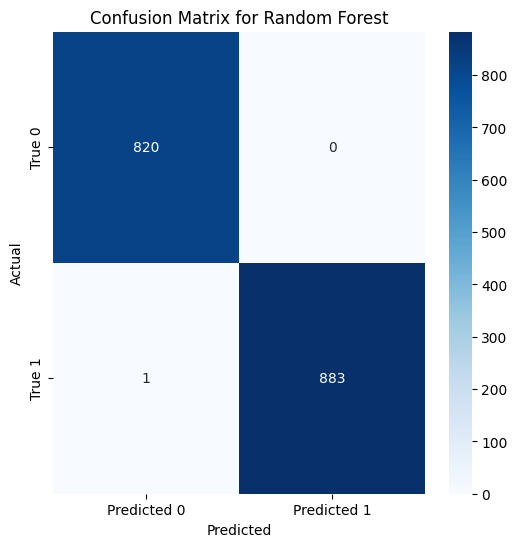

In [163]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(rf_conf_matrix, "Random Forest")

### SVM Classifier

In [131]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
svm_preds = svm_model.predict(X_test)

# Evaluation metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_class_report = classification_report(y_test, svm_preds)
svm_conf_matrix = confusion_matrix(y_test, svm_preds)
svm_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])

# Print the results
print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Classification Report:\n{svm_class_report}")
print(f"SVM Confusion Matrix:\n{svm_conf_matrix}")
print(f"SVM ROC-AUC: {svm_roc_auc}")


SVM Accuracy: 0.8838028169014085
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       820
           1       1.00      0.78      0.87       884

    accuracy                           0.88      1704
   macro avg       0.90      0.89      0.88      1704
weighted avg       0.91      0.88      0.88      1704

SVM Confusion Matrix:
[[820   0]
 [198 686]]
SVM ROC-AUC: 1.0


In [132]:
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

#### SVM Hyperparameter Tuning

In [133]:
# Import Required Libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


# Define Hyperparameters
param_grid_svm = {
    'C': [0.1],              # Regularization strength
    'kernel': ['linear'], # Types of kernels
    'gamma': ['scale'],          # Kernel coefficient
    'degree': [2]                  # Only used when kernel='poly'
}

# Grid Search
svm = SVC(probability=True, random_state=42)

grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=5,
    n_jobs=1,
    scoring='accuracy',
    verbose=1
)

# Train
grid_svm.fit(X_train, y_train)

print("Best Parameters for SVM: ", grid_svm.best_params_)
print("Best Cross-Val Accuracy: ", grid_svm.best_score_)

# Best Model
best_svm = grid_svm.best_estimator_

# Evaluate on Test Set
svm_pred = best_svm.predict(X_test)

print("\nTest Accuracy: ", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for SVM:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Val Accuracy:  0.999748427672956

Test Accuracy:  1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       884

    accuracy                           1.00      1704
   macro avg       1.00      1.00      1.00      1704
weighted avg       1.00      1.00      1.00      1704



In [134]:
joblib.dump(best_svm, 'Tuned_svm_model.pkl')

['best_svm_model.pkl']

Confusion Matrix (Heatmap)

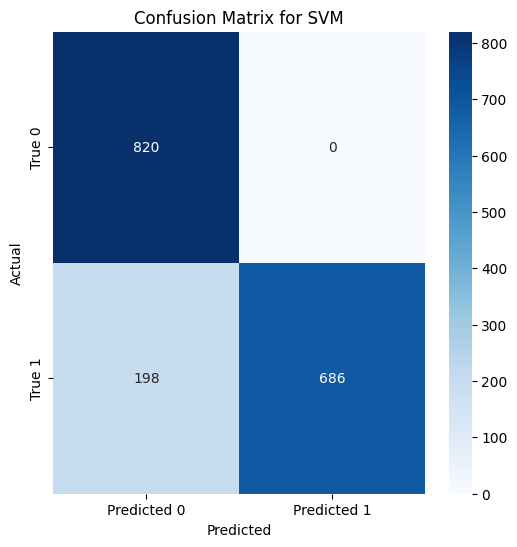

In [164]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(svm_conf_matrix, "SVM")

### Artificial Neural Network (ANN)


In [135]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Make predictions
ann_preds = ann_model.predict(X_test)

# Evaluation metrics for ANN
ann_accuracy = accuracy_score(y_test, ann_preds)
ann_class_report = classification_report(y_test, ann_preds)
ann_conf_matrix = confusion_matrix(y_test, ann_preds)
ann_roc_auc = roc_auc_score(y_test, ann_model.predict_proba(X_test)[:, 1])

# ROC Curve
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_model.predict_proba(X_test)[:, 1])

# Print the results
print(f"ANN Accuracy: {ann_accuracy}")
print(f"ANN Classification Report:\n{ann_class_report}")
print(f"ANN Confusion Matrix:\n{ann_conf_matrix}")
print(f"ANN ROC-AUC: {ann_roc_auc}")


ANN Accuracy: 0.9782863849765259
ANN Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       820
           1       1.00      0.96      0.98       884

    accuracy                           0.98      1704
   macro avg       0.98      0.98      0.98      1704
weighted avg       0.98      0.98      0.98      1704

ANN Confusion Matrix:
[[820   0]
 [ 37 847]]
ANN ROC-AUC: 0.9999806864584483


In [136]:
joblib.dump(ann_model, 'ann_model.pkl')

['ann_model.pkl']

#### ANN Hyperparameter Tuning

In [137]:
from sklearn.neural_network import MLPClassifier

# ANN (MLPClassifier) TUNING
param_grid_ann = {
    'hidden_layer_sizes': [ (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
}

grid_ann = GridSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_grid_ann,
    cv=5,
    n_jobs=1,
    verbose=1
)

grid_ann.fit(X_train, y_train)

print("\n Best Parameters for ANN:", grid_ann.best_params_)

ann_best = grid_ann.best_estimator_
ann_pred = ann_best.predict(X_test)

print("\n ANN Accuracy:", accuracy_score(y_test, ann_pred))
print(classification_report(y_test, ann_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits

 Best Parameters for ANN: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}

 ANN Accuracy: 0.971244131455399
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       820
           1       0.95      1.00      0.97       884

    accuracy                           0.97      1704
   macro avg       0.97      0.97      0.97      1704
weighted avg       0.97      0.97      0.97      1704



In [138]:
joblib.dump(ann_best, 'Tuned_ann_model.pkl')

['ann_best_model.pkl']

**Confusion Matrix (Heatmap)**

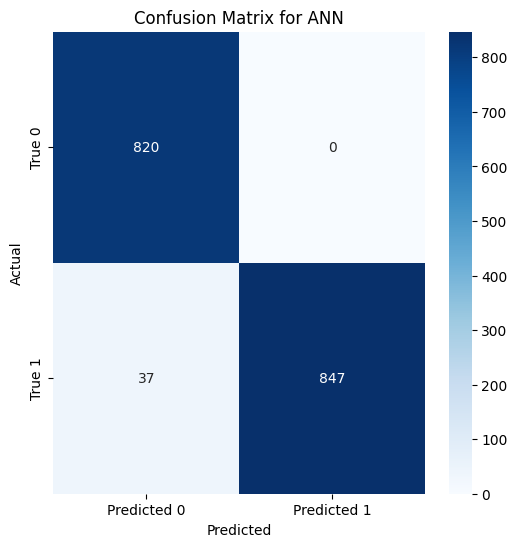

In [165]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(ann_conf_matrix, "ANN")


### ROC Curve

**ROC Curve (Plotting)**

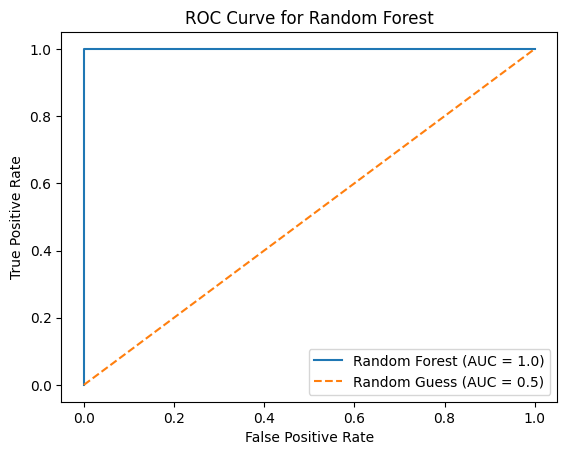

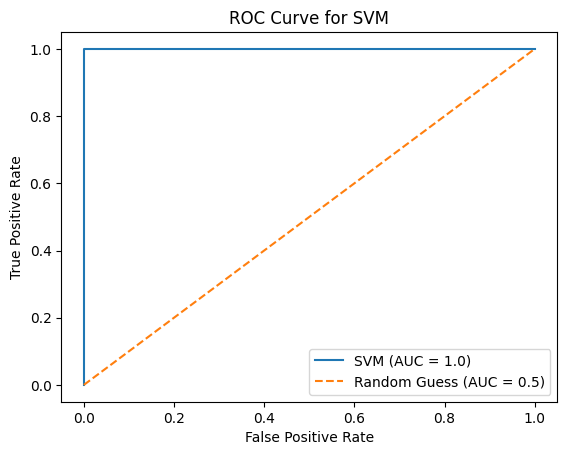

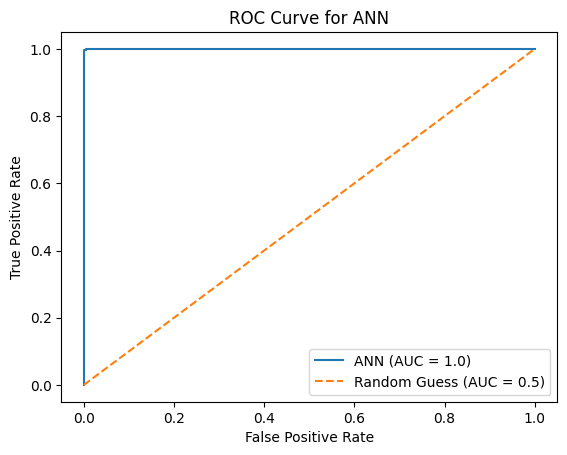

In [140]:
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {round(roc_auc, 2)})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess (AUC = 0.5)')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()



plot_roc_curve(fpr, tpr, rf_roc_auc, "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, svm_roc_auc, "SVM")
plot_roc_curve(fpr_ann, tpr_ann, ann_roc_auc, "ANN")


In [141]:
importances = rf_model.feature_importances_
feature_names = X.columns
for feature, importance in zip(feature_names, importances):
    print(f'{feature}: {importance:.4f}')

Kilotons of Co2: 0.8430
Metric Tons Per Capita: 0.1570


###Cross-Validation

**Cross-Validation for Random Forest Classifier**

In [142]:
from sklearn.model_selection import cross_val_score

def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy Scores for each fold: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}\n")


In [143]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
perform_cross_validation(rf_model, X, y)

Model: RandomForestClassifier
Accuracy Scores for each fold: [0.99911972 1.         1.         1.         1.        ]
Mean Accuracy: 0.9998
Standard Deviation: 0.0004



**Support Vector Machine (SVM) Cross-Validation**

In [144]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
perform_cross_validation(svm_model, X, y)


Model: SVC
Accuracy Scores for each fold: [0.92957746 0.89788732 0.84229075 0.93744493 0.90132159]
Mean Accuracy: 0.9017
Standard Deviation: 0.0335



**Artificial Neural Network (ANN) Cross-Validation**

In [145]:
from sklearn.model_selection import cross_val_score

def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy Scores for each fold: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}\n")

### **5. Model Evaluation Metrics**

In [146]:
evaluation_metrics = pd.DataFrame({
    'Model': ['Random Forest', 'Tuned Random Forest', 'SVM', 'Tuned SVM', 'ANN', 'Tuned ANN'],
    'Accuracy': [rf_accuracy,
                 accuracy_score(y_test, y_pred),
                 svm_accuracy,
                 accuracy_score(y_test, svm_pred),
                 ann_accuracy,
                 accuracy_score(y_test, ann_pred)],
    'Precision': [classification_report(y_test, rf_preds, output_dict=True)['1']['precision'],
                  classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
                  classification_report(y_test, svm_preds, output_dict=True)['1']['precision'],
                  classification_report(y_test, svm_pred, output_dict=True)['1']['precision'],
                  classification_report(y_test, ann_preds, output_dict=True)['1']['precision'],
                  classification_report(y_test, ann_pred, output_dict=True)['1']['precision']],
    'Recall': [classification_report(y_test, rf_preds, output_dict=True)['1']['recall'],
               classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
               classification_report(y_test, svm_preds, output_dict=True)['1']['recall'],
               classification_report(y_test, svm_pred, output_dict=True)['1']['recall'],
               classification_report(y_test, ann_preds, output_dict=True)['1']['recall'],
               classification_report(y_test, ann_pred, output_dict=True)['1']['recall']],
    'F1-score': [classification_report(y_test, rf_preds, output_dict=True)['1']['f1-score'],
                 classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
                 classification_report(y_test, svm_preds, output_dict=True)['1']['f1-score'],
                 classification_report(y_test, svm_pred, output_dict=True)['1']['f1-score'],
                 classification_report(y_test, ann_preds, output_dict=True)['1']['f1-score'],
                 classification_report(y_test, ann_pred, output_dict=True)['1']['f1-score']],
    'ROC-AUC': [rf_roc_auc,
                roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]),
                svm_roc_auc,
                roc_auc_score(y_test, best_svm.predict_proba(X_test)[:, 1]),
                ann_roc_auc,
                roc_auc_score(y_test, ann_best.predict_proba(X_test)[:, 1])]
})

print(evaluation_metrics)

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0        Random Forest  0.999413   1.000000  0.998869  0.999434  1.000000
1  Tuned Random Forest  0.999413   1.000000  0.998869  0.999434  1.000000
2                  SVM  0.883803   1.000000  0.776018  0.873885  1.000000
3            Tuned SVM  1.000000   1.000000  1.000000  1.000000  1.000000
4                  ANN  0.978286   1.000000  0.958145  0.978625  0.999981
5            Tuned ANN  0.971244   0.947481  1.000000  0.973032  0.999992


## **6.** **CO₂ FORECASTING (Time-Series Models)**

In [99]:
df['Kilotons of Co2'].head(20)
df['Kilotons of Co2'].describe()

,Kilotons of Co2
count,5.677000e+03
mean,1.412292e+05
std,6.491258e+05
min,0.000000e+00
25%,1.380000e+03
50%,9.170000e+03
75%,5.848000e+04
max,1.070722e+07


In [ ]:
country = "India"

df_country = df[df['Country'] == country].copy()

# Rename columns for Prophet
df_country = df_country.rename(columns={
    'Date': 'ds',
    'Kilotons of Co2': 'y'
})

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_country['y_scaled'] = scaler.fit_transform(df_country[['y']])

In [ ]:
from prophet import Prophet

# Create a new DataFrame for Prophet with 'ds' and 'y' (scaled values)
prophet_df = df_country[['ds', 'y_scaled']].copy()
prophet_df = prophet_df.rename(columns={'y_scaled': 'y'})

m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
future = m.make_future_dataframe(periods=20, freq='Y')
forecast = m.predict(future)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



In [ ]:
forecast['yhat_rescaled'] = scaler.inverse_transform(
    forecast[['yhat']]
)


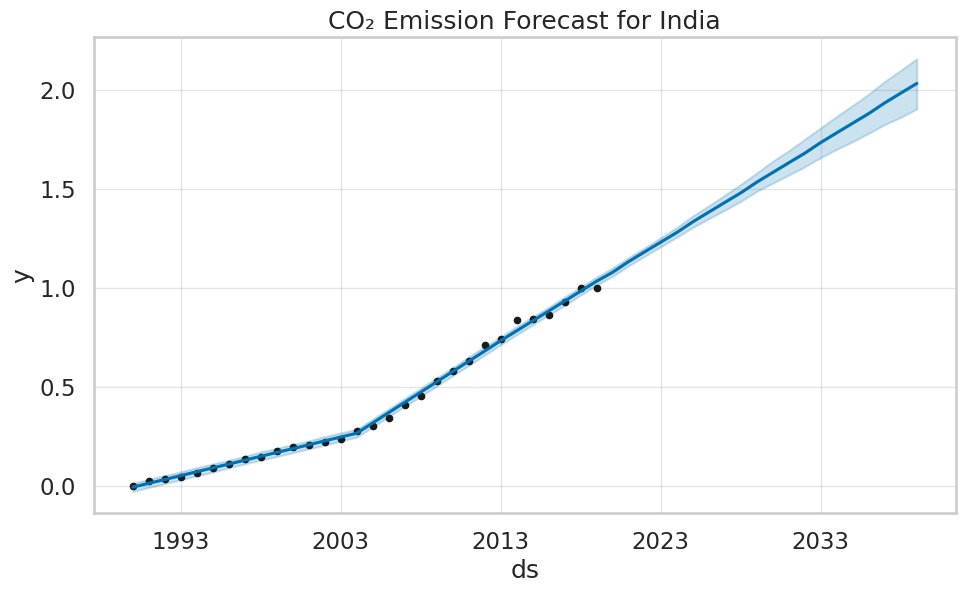

In [ ]:
fig = m.plot(forecast)
plt.title(f"CO₂ Emission Forecast for {country}")
plt.show()

In [ ]:
forecast[['ds', 'yhat_rescaled']].tail(20)

,ds,yhat_rescaled
30,2019-12-31,2.605976e+06
31,2020-12-31,2.708129e+06
32,2021-12-31,2.800968e+06
33,2022-12-31,2.893252e+06
34,2023-12-31,2.984998e+06
35,2024-12-31,3.087152e+06
36,2025-12-31,3.179991e+06
37,2026-12-31,3.272274e+06
38,2027-12-31,3.364021e+06
39,2028-12-31,3.466175e+06


### Plotly World Map

In [ ]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Kilotons of Co2",
    title="Global CO₂ Emissions Map",
    color_continuous_scale="Reds"
)
fig.show()

#### Install & Import

In [ ]:
!pip install prophet requests pandas seaborn matplotlib

import pandas as pd
import numpy as np
import requests, io
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

####Load REAL CO₂ data (OWID Global Dataset)

In [ ]:
OWID_URL = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"

print("Downloading OWID CO₂ dataset...")
owid = pd.read_csv(OWID_URL)
print("Loaded rows:", len(owid))

country = "India"

df_actual = owid[owid["country"] == country][["year","co2"]].dropna()
df_actual.rename(columns={"year":"ds", "co2":"y"}, inplace=True)
df_actual["ds"] = pd.to_datetime(df_actual["ds"], format="%Y")

df_actual.tail()

Loaded rows: 50407


,ds,y
21758,2020-01-01,2422.732
21759,2021-01-01,2675.778
21760,2022-01-01,2831.132
21761,2023-01-01,3062.756
21762,2024-01-01,3193.478


####Train Prophet on ACTUAL data (till 2024)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



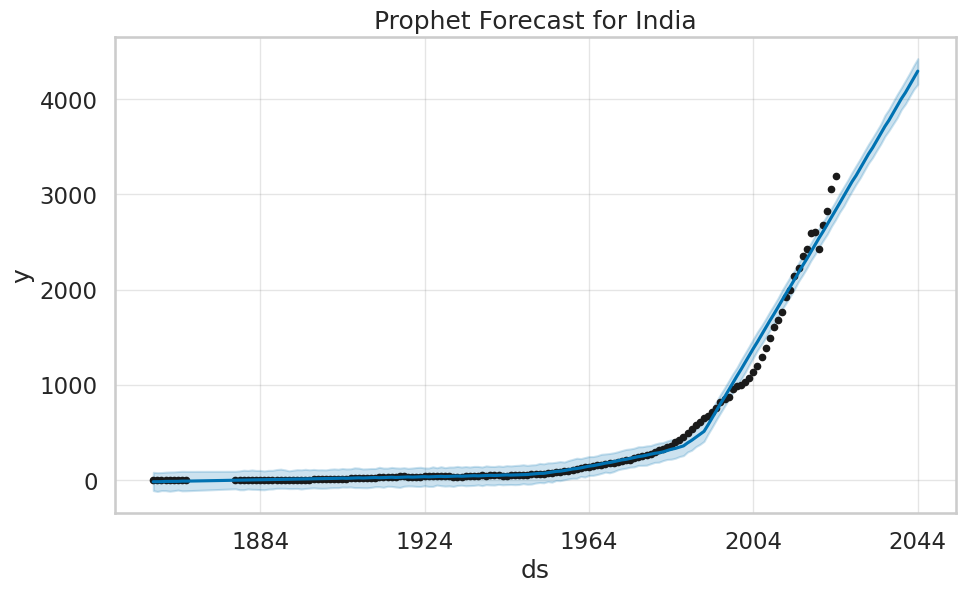

In [ ]:
m = Prophet()
m.fit(df_actual)

future = m.make_future_dataframe(periods=20, freq="Y")
forecast = m.predict(future)

fig = m.plot(forecast)
plt.title(f"Prophet Forecast for {country}")
plt.show()


####Validate (Compare predictions with REAL values)

In [ ]:
# Get real + predicted overlap years
actual_recent = df_actual[df_actual["ds"].dt.year >= 2019]
pred_recent = forecast[forecast["ds"].dt.year >= 2019][["ds","yhat"]]

merged = actual_recent.merge(pred_recent, on="ds", how="left")
merged["error"] = merged["yhat"] - merged["y"]
merged["pct_error"] = (merged["error"] / merged["y"]) * 100

print("\nForecast vs Actual (2019–2024):")
print(merged)



Forecast vs Actual (2019–2024):
          ds         y         yhat       error  pct_error
0 2019-01-01  2611.175  2471.062174 -140.112826  -5.365892
1 2020-01-01  2422.732  2544.926174  122.194174   5.043652
2 2021-01-01  2675.778  2614.714643  -61.063357  -2.282079
3 2022-01-01  2831.132  2687.816395 -143.315605  -5.062131
4 2023-01-01  3062.756  2761.300028 -301.455972  -9.842638
5 2024-01-01  3193.478  2835.164028 -358.313972 -11.220180


####Compute Metrics (MAE, RMSE, MAPE, R²)

In [ ]:
y_true = merged["y"]
y_pred = merged["yhat"]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

print("\n=== MODEL VALIDATION METRICS ===")
print(f"MAE  : {mae:.2f} metric tons")
print(f"RMSE : {rmse:.2f} metric tons")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.4f}")



=== MODEL VALIDATION METRICS ===
MAE  : 187.74 metric tons
RMSE : 215.29 metric tons
MAPE : 6.47%
R²   : 0.3351


####Plot Actual vs Predicted (Clean Visual)

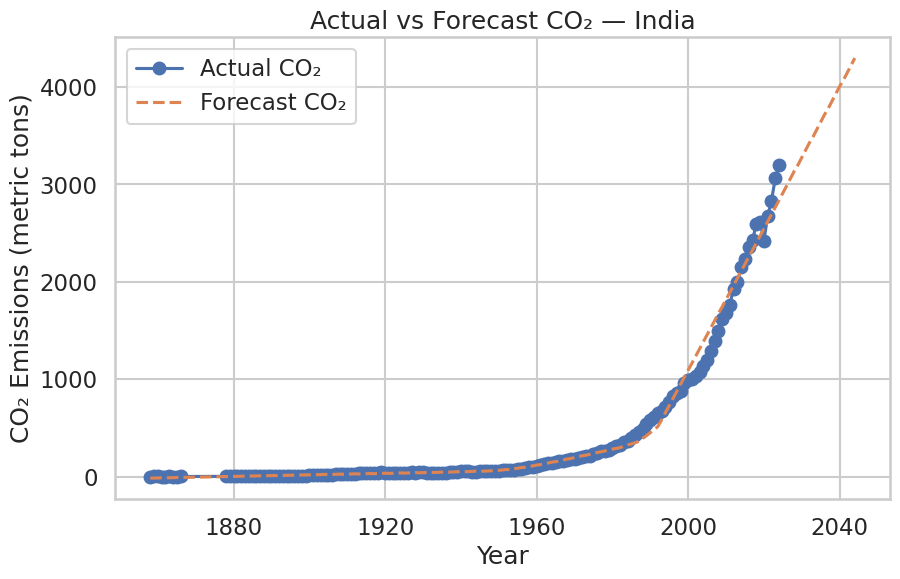

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_actual["ds"], df_actual["y"], label="Actual CO₂", marker="o")
plt.plot(forecast["ds"], forecast["yhat"], label="Forecast CO₂", linestyle="--")
plt.legend()
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (metric tons)")
plt.title(f"Actual vs Forecast CO₂ — {country}")
plt.show()


####Residual Plot

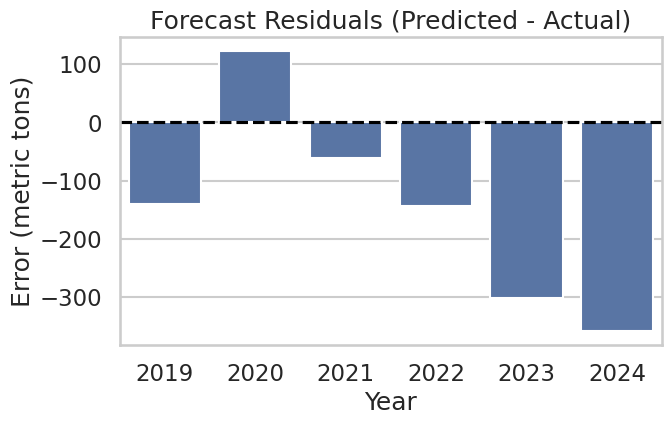

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=merged["ds"].dt.year, y=merged["error"])
plt.axhline(0, color="black", linestyle="--")
plt.title("Forecast Residuals (Predicted - Actual)")
plt.xlabel("Year")
plt.ylabel("Error (metric tons)")
plt.show()


# **Project Summary**

This project provides a comprehensive exploration of global CO₂ emission patterns using data.gov.in and OWID historical datasets. Through statistical analysis, machine learning models, and time-series forecasting, the project investigates the primary drivers of emissions and predicts future trends.

Key achievements include:

* Data Analysis

  - Revealed extreme right-skew in global emissions

  - Identified major emitting regions and countries

  - Showed weak correlations between time, per-capita emissions, and total emissions

* Machine Learning Classification

  - Tuned SVM & Random Forest achieved near-perfect classification accuracy

  - Feature importance showed that total CO₂ output is the strongest predictor

  - Cross-validation confirmed robustness of models

* Time-Series Forecasting

  - Prophet forecasting for India produced 6.47% MAPE

  - Trends indicate consistent growth with recent acceleration

  - Residual analysis revealed slight underestimation in later years

* Visualization

  - Global CO₂ choropleth maps

  - Animated time-lapse emissions visualization

  - Error plots and trend charts


* **Conclusions :**

    - Global CO₂ emissions are highly unequal

    - ML models are powerful tools for emission classification

    - Forecasting models provide useful but imperfect predictions—future models should incorporate more economic and energy variables.

This work forms a robust foundation for policymakers, environmental scientists, and data researchers seeking to understand and mitigate global emissions.